In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

$\hat y_i = \textbf{w} \sdot \textbf{x}_i + b$

In [3]:
data = np.array(data)



$n$ = number of dataset <br>
$m$ = number of feature <br>
$\textbf{w} = 
\left[
    \begin{array}{ccc}
    a_1 & \cdots & a_n
    \end{array}     
\right]^T$

$$L(\textbf{w}) = \frac{1}{2}\sum_{i=1}^{n} (\hat y_i - y_i)^2
\Leftrightarrow L(\textbf{w}) = \frac{1}{2}\sum_{i=1}^{n} (\textbf{x}_i \sdot \textbf{w} - y_i)^2\tag{1}$$


$\text{I need find } \textbf{w}^* = \underset{\textbf{w}}\argmax L(\textbf{w}) $

$$\text{(1)} \Leftrightarrow L(\textbf{w}) = ||\textbf{x}\sdot\textbf{w} - \textbf{y}||^2_2 \tag{2}$$
$\text{with } ||\textbf{z}||^2_2 \text{ is Euclidean norm}$


$\text{Case directly calculate: }$
$\frac{\partial L(\textbf{w})}{\partial \textbf{w}} = \textbf{x}^T(\textbf{x} \sdot \textbf{w} - \textbf{y})\\$
$\text{With gradient equals 0. We have } \textbf{b} \colonequals \textbf{x}^T\textbf{x}\textbf{w} = \textbf{x}^T\textbf{y}$

$\text{Set }\textbf{a} \colonequals \textbf{x}^T\textbf{x}\text{. If }\det{a} \neq 0 \text{ then }\textbf{w} = \textbf{a}^{-1} \sdot b$

$\text{Case use gradient descent: }$ 
$$ \nabla_\textbf{w}L(\textbf{w}) = \frac{1}{n}\textbf{x}^T(\textbf{x} \sdot \textbf{w} - \textbf{y}) \tag{3}$$

$\text{Why (3)} \neq \text{(2)? } \text{Because, dataset may be very large, so we divide } \nabla_{\text{w}} L(\textbf{w}) \text{ for } n, \text{with }n\text{ is number of dataset} $

$\text{When } f'(x_t) > 0\text{: it means }x^* < x_t \text{ so we need update }x_t \text{ with equation below: }$
$$x_{t+1} \colonequals x_t + \nabla$$
$\text{With } \nabla \colonequals -f'(x_t)$

$\text{Because }x_t > x^* \text{, want } x_t \text{ closer to } x^*, \text{ have to } x_{t+1} \colonequals x_t - \theta \text{, } \theta > 0$

$\text{Define } \eta \text{ is learning rate, this is speed update of } x_t \text{. Normally, }\eta \le 1$.

$$x_{t+1} \colonequals x_t - \eta f'(x_t) \tag{4}$$

$\text{In Linear Regression: }$
$$\textbf{(3)(4)} \Leftrightarrow \textbf{w} \colonequals \textbf{w} - \eta \nabla_{\textbf{w}}L(\textbf{w})$$
$$\Leftrightarrow \textbf{w} \colonequals \textbf{w} - \eta [\textbf{x}^T(\textbf{x} \sdot \textbf{w} - \textbf{y})]\tag{5}$$

In [23]:
n,m = data.shape
x = np.reshape(np.array(data[:,0]),(n,1))
one = np.ones((x.shape[0],1))
x = np.concatenate((one, x), axis = 1)
y = np.array(data[:,1]).reshape((n,1))
print(x.shape)
print(y.shape)

(300, 2)
(300, 1)


In [22]:
miny = np.min(y)
maxy = np.max(y)
for i in range(y.shape[0]):
    y[i] = (y[i] - miny)/(maxy-miny)
print(y.shape[0],np.argmax(y))
print(x)
print(y)

300 87
[[  1.  77.]
 [  1.  21.]
 [  1.  22.]
 [  1.  20.]
 [  1.  36.]
 [  1.  15.]
 [  1.  62.]
 [  1.  95.]
 [  1.  20.]
 [  1.   5.]
 [  1.   4.]
 [  1.  19.]
 [  1.  96.]
 [  1.  62.]
 [  1.  36.]
 [  1.  15.]
 [  1.  65.]
 [  1.  14.]
 [  1.  87.]
 [  1.  69.]
 [  1.  89.]
 [  1.  51.]
 [  1.  89.]
 [  1.  27.]
 [  1.  97.]
 [  1.  58.]
 [  1.  79.]
 [  1.  21.]
 [  1.  93.]
 [  1.  27.]
 [  1.  99.]
 [  1.  31.]
 [  1.  33.]
 [  1.  80.]
 [  1.  28.]
 [  1.  47.]
 [  1.  53.]
 [  1.  69.]
 [  1.  28.]
 [  1.  33.]
 [  1.  91.]
 [  1.  71.]
 [  1.  50.]
 [  1.  76.]
 [  1.   4.]
 [  1.  37.]
 [  1.  70.]
 [  1.  68.]
 [  1.  40.]
 [  1.  35.]
 [  1.  94.]
 [  1.  88.]
 [  1.  52.]
 [  1.  31.]
 [  1.  59.]
 [  1.   0.]
 [  1.  39.]
 [  1.  64.]
 [  1.  69.]
 [  1.  57.]
 [  1.  13.]
 [  1.  72.]
 [  1.  76.]
 [  1.  61.]
 [  1.  82.]
 [  1.  18.]
 [  1.  41.]
 [  1.  50.]
 [  1.  55.]
 [  1.  13.]
 [  1.  46.]
 [  1.  13.]
 [  1.  79.]
 [  1.  53.]
 [  1.  15.]
 [  1.  28.]
 [  1

$\text{grad(w, x, y) is function to calculate gradient } \nabla_{\textbf{w}} L(\textbf{w})$

In [15]:
def grad(w,x,y):
    N = x.shape[0] # 300x2
    return 1/(N) * x.T.dot(x.dot(w) - y)

def cost(w,x,y):
    N = x.shape[0]
    return .5/(N)*np.linalg.norm(y - x.dot(w), 2)**2

In [16]:
def grad_descent(w, x, y, eta):
    time = 0
    tmp = 0
    while(True):
        time += 1
        grd = grad(w,x,y) #2x1
        w = w - eta*grd
        pres = np.linalg.norm(grd - grad(w,x,y))
        if pres < 1e-6 and time > 1:
            break
        if pres > tmp and time>3:
            print(-1)
            break
        tmp = pres
    print("time: ",time)
    return w

In [17]:
w = np.array([[0,0]]).T
w.reshape((1,2))
#print(grad(w,x,y))
#print(cost(w,x,y))
print(w.shape)
W = grad_descent(w,x,y,0.0000005)
#print(W.shape)
print(W)

(2, 1)
time:  6421
[[0.00016623]
 [0.00971052]]


In [18]:
def numerical_grad(w, x,y,cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p,x,y) - cost(w_n,x,y))/(2*eps)
    return g 

def check_grad(w, x,y,cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w,x,y)
    grad2 = numerical_grad(w,x,y, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

In [19]:
tmp = np.random.rand(2, 1)
print(tmp)
print( 'Checking gradient...', check_grad(np.random.rand(2, 1),x,y, cost, grad))

[[0.02308407]
 [0.98998448]]
Checking gradient... True


[[  1   0]
 [  1 100]] [[0.00016623]
 [0.00971052]]
[[1.66232755e-04]
 [9.71217935e-01]]
[1.]


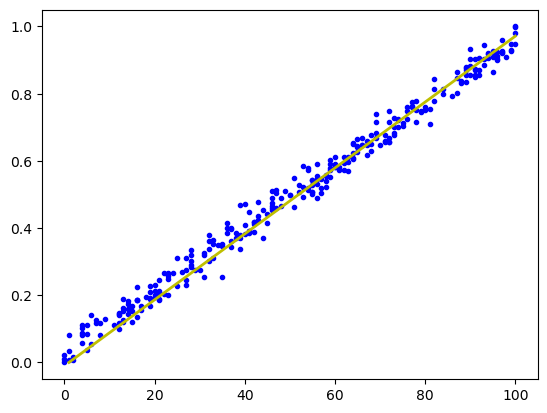

In [20]:
x0 = np.array([[1,0],[1,100]])
y0 = x0.dot(W)
print(x0,W)
print(y0)
print(max(y))
plt.plot(x[:,1].T, y, 'b.')
plt.plot(x0[1,:],y0[:,0],'y',linewidth = 2)